# Problem 7: Parzen Window Classifier

The Parzen window classifier is a classifier that is based on the kernel density estimation method. In these classifiers, we estimate the densities for each class and classify a test point by the label corresponding to the maximum posterior. 

Formally, the discriminant function for this classifier is,
$$
g_i(\mathbf{x}) = p_n(\mathbf{x} \mid \omega_i)=\frac{1}{n} \sum_{j=1}^n \frac{1}{V_n} \varphi\left(\frac{\mathbf{x}-\mathbf{x}_j}{h_n}\right)
$$
where, $\varphi(u)$ is a density function that we call Kernel (Window) function, $h_n$ is the bandwidth or window width and $\mathbf{x}_j$ is the $j$-th training data belonging to class $\omega_i$.

In this problem, we use this classifier to classify across three classes using 2-dimensional features. 

## Packages
First we import all necessary libraries.

In [126]:
import numpy as np
import matplotlib.pyplot as plt

## Familiarization with Data ($n = 50$)
Let us create and familiarize ourselves with the data by plotting them side by side.

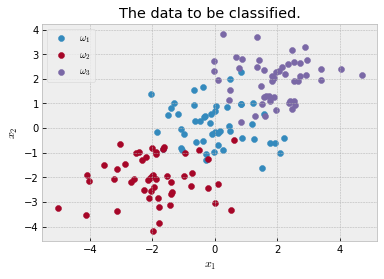

In [127]:
# Distribution parameters
mean1 = [0, 0]
mean2 = [-2, -2]
mean3 = [2, 2]
covariance = [[1, 0], [0, 1]]

# Generate data according to their distribution
np.random.seed(43)
data1 = np.random.multivariate_normal(mean1, covariance, 50)
data2 = np.random.multivariate_normal(mean2, covariance, 50)
data3 = np.random.multivariate_normal(mean3, covariance, 50)

# Plot the data
plt.style.use("bmh")
fix, ax = plt.subplots()
ax.scatter(data1[:, 0], data1[:, 1], label="$\omega_1$")
ax.scatter(data2[:, 0], data2[:, 1], label="$\omega_2$")
ax.scatter(data3[:, 0], data3[:, 1], label="$\omega_3$")
ax.legend()
ax.grid(True)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.title(f"The data to be classified.")
# plt.savefig("data.png", dpi = 350)
plt.show()

## Kernel Density Estimator

Then, we create a function implementing the kernel density estimator $p_n(x)$, which takes as its argument hyper-parameter bandwidth. Notice how $V_n = h_n^2$.

$$
\begin{align*}
p_n(\mathbf{x})&=\frac{1}{n} \sum_{i=1}^n \frac{1}{V_n} \varphi\left(\frac{\mathbf{x}-\mathbf{x}_i}{h_n}\right)\\
& = \frac{1}{n} \sum_{i=1}^n \frac{1}{h_n^2} \varphi\left(\frac{\mathbf{x}-\mathbf{x}_i}{h_n}\right) \\
\end{align*}
$$

Using the spherical Gaussian kernel we can rewrite this as:
$$
\begin{align*}
p_n(\mathbf{x}) &\propto \frac{1}{n} \sum_{i=1}^n \frac{1}{h_n^2} \exp \left[-\left(\mathbf{x}-\mathbf{x}_i\right)^T\left(\mathbf{x}-\mathbf{x}_i\right) /\left(2 h_n^2\right)\right] \\
&= \frac{1}{n} \sum_{i=1}^n \frac{1}{h_n^2} \exp \left[- \frac{\|\mathbf{x} - \mathbf{x}_i \|_2^2}{ 2h_n^2 }   \right]
\end{align*}
$$

In [128]:
def sphericalGaussianKernel(x, x_train, bandwidth):
    # Compute L2 norm used in the formula
    L2_norm = np.sum((x - x_train) ** 2)
    
    # Normalize over the bandwidth
    return np.exp(-L2_norm / (2 * bandwidth ** 2))

In [129]:
def kernelDensityEstimator(x, x_train, bandwidth):
    p_hat = []
    n = len(x_train)
    for j in range(len(x)):
        s = 0
        for i in range(n):
            phi = sphericalGaussianKernel(x[j], x_train[i], bandwidth)
            s += (1 / n) * (1 / bandwidth ** 2) * phi
        p_hat.append(s)

    return p_hat

## Test

We use our code to classify among the three classes, using $V_n$ of $1$ and $0.1$ separately. Then classify 4 arbitrary data points according to the classifier's decison rule.

[[ 1.01  1.01]
 [-0.98 -1.  ]
 [-1.    0.  ]
 [-2.   -1.  ]]


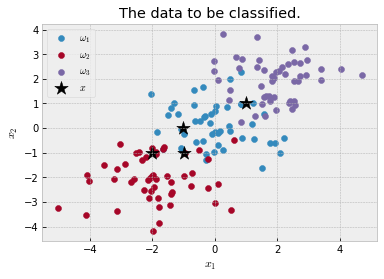

In [130]:
# Choose the 4 points
x = np.array([[1.01 ,1.01], [-0.98, -1], [-1, 0], [-2, -1]])

print(x)

# Plot them with the other data
plt.style.use("bmh")
fix, ax = plt.subplots()
ax.scatter(data1[:, 0], data1[:, 1], label="$\omega_1$")
ax.scatter(data2[:, 0], data2[:, 1], label="$\omega_2$")
ax.scatter(data3[:, 0], data3[:, 1], label="$\omega_3$")
ax.scatter(x[:, 0], x[:, 1], label="$x$", marker="*", s=200, c="black")
ax.legend()
ax.grid(True)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.title(f"The data to be classified.")
# plt.savefig("data.png", dpi = 350)
plt.show()

### Case 1: $V_n = 1$

In [131]:
bandwidth = 1

In [132]:
# Estimate the class-conditional probabilities
p_hat = np.array(
    [kernelDensityEstimator(x, data1, bandwidth),
        kernelDensityEstimator(x, data2, bandwidth),
            kernelDensityEstimator(x, data3, bandwidth)]
    )

# The predictions based on the largest estimated density
pred = p_hat.argmax(axis=0) + 1
pred

array([3, 1, 1, 2])

Thus points [-0.92312972 -0.49649413], [-4.4463396  -1.96087695], [ 2.88534877  0.26399524], and [-2.12694815  1.23812213] are classified as $\omega_1, \omega_2, \omega_3,$ and $\omega_1$, respectively when $V_n = 1$.

### Case 2: $V_n = 0.1$

In [134]:
bandwidth = np.sqrt(0.1)

In [135]:
# Estimate the class-conditional probabilities
p_hat = np.array(
    [kernelDensityEstimator(x, data1, bandwidth),
        kernelDensityEstimator(x, data2, bandwidth),
            kernelDensityEstimator(x, data3, bandwidth)]
    )

# The predictions based on the largest estimated density
pred = p_hat.argmax(axis=0) + 1
pred

array([1, 1, 1, 2])

The results match up since the close and not so close neighborhood of the 4 data are covered dominantly by one of the classes, thus this change to the bandwidth does not change the outcome here.

## Familiarization with Data ($n = 500$)
Let us create and familiarize ourselves with the data by plotting them side by side.

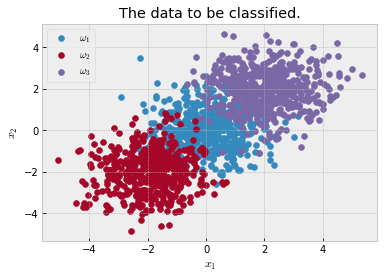

In [177]:
# Distribution parameters
mean1 = [0, 0]
mean2 = [-2, -2]
mean3 = [2, 2]
covariance = [[1, 0], [0, 1]]

# Generate data according to their distribution
np.random.seed(30)
data1 = np.random.multivariate_normal(mean1, covariance, 500)
data2 = np.random.multivariate_normal(mean2, covariance, 500)
data3 = np.random.multivariate_normal(mean3, covariance, 500)

# Plot the data
plt.style.use("bmh")
fix, ax = plt.subplots()
ax.scatter(data1[:, 0], data1[:, 1], label="$\omega_1$")
ax.scatter(data2[:, 0], data2[:, 1], label="$\omega_2$")
ax.scatter(data3[:, 0], data3[:, 1], label="$\omega_3$")
ax.legend()
ax.grid(True)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.title(f"The data to be classified.")
# plt.savefig("data.png", dpi = 350)
plt.show()

## Test

We use our code to classify among the three classes, using $V_n$ of $1$ and $0.1$ separately. Then classify 4 arbitrary data points according to the classifier's decison rule.

[[ 1.01  1.01]
 [-0.98 -1.  ]
 [-1.    0.  ]
 [-2.   -1.  ]]


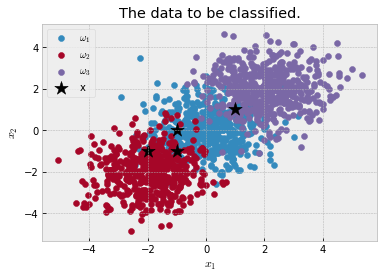

In [178]:
# Choose the 4 points randomly.
np.random.seed(35)
x = np.array([[1.01 ,1.01], [-0.98, -1], [-1, 0], [-2, -1]])

print(x)

# Plot them with the other data
plt.style.use("bmh")
fix, ax = plt.subplots()
ax.scatter(data1[:, 0], data1[:, 1], label="$\omega_1$")
ax.scatter(data2[:, 0], data2[:, 1], label="$\omega_2$")
ax.scatter(data3[:, 0], data3[:, 1], label="$\omega_3$")
ax.scatter(x[:, 0], x[:, 1], label="x", marker="*", s=200, c="black")
ax.legend()
ax.grid(True)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.title(f"The data to be classified.")
# plt.savefig("data.png", dpi = 350)
plt.show()

### Case 1: $V_n = 1$

In [173]:
bandwidth = 1

In [174]:
# Find the class-conditional probabilities
p_hat = np.array(
    [kernelDensityEstimator(x, data1, bandwidth),
        kernelDensityEstimator(x, data2, bandwidth),
            kernelDensityEstimator(x, data3, bandwidth)]
    )

# The predictions based on the largest estimated density
pred = p_hat.argmax(axis=0) + 1
pred

array([1, 2, 1, 2])

### Case 2: $V_n = 0.1$

In [175]:
bandwidth = np.sqrt(0.1)

In [176]:
# Find the class-conditional probabilities
p_hat = np.array(
    [kernelDensityEstimator(x, data1, bandwidth),
        kernelDensityEstimator(x, data2, bandwidth),
            kernelDensityEstimator(x, data3, bandwidth)]
    )

# The predictions based on the largest estimated density
pred = p_hat.argmax(axis=0) + 1
pred

array([3, 1, 1, 2])